In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Baca file dataset
data = pd.read_csv("mall_cust.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# mengecek nilai null pada dataset
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## K-Means

In [5]:
from sklearn.preprocessing import StandardScaler

points = data[['Age', 'Annual Income (k$)']]
points = points.values

ss = StandardScaler()
x_scaled = ss.fit_transform(points)

In [6]:
# dimisalkan kluster yang dipake adalah 3
model = KMeans(n_clusters = 3)
model.fit(points)

KMeans(n_clusters=3)

In [7]:
y = model.fit_predict(points)
print(y)

[2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


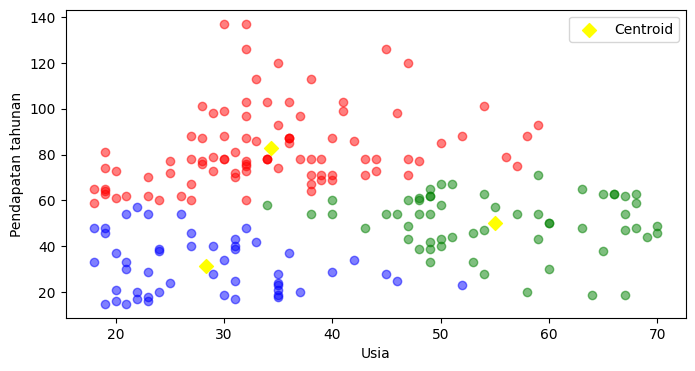

In [8]:
centroids = model.cluster_centers_

centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize = (8,4))
plt.scatter(points[y == 0,0], points[y == 0,1], c = 'green', alpha = 0.5)
plt.scatter(points[y == 1,0], points[y == 1,1], c = 'red', alpha = 0.5)
plt.scatter(points[y == 2,0], points[y == 2,1], c = 'blue', alpha = 0.5)

plt.scatter(centroid_x, centroid_y, marker = "D", s = 50, label = "Centroid", c = 'yellow')
plt.xlabel("Usia")
plt.ylabel("Pendapatan tahunan")
plt.legend()
plt.show()

## Hirarcichal

In [9]:
from sklearn.cluster import AgglomerativeClustering

#Buat objek dari AgglomerativeClustering dengan jumlah cluster : 3
hc_cluster = AgglomerativeClustering(n_clusters=3)

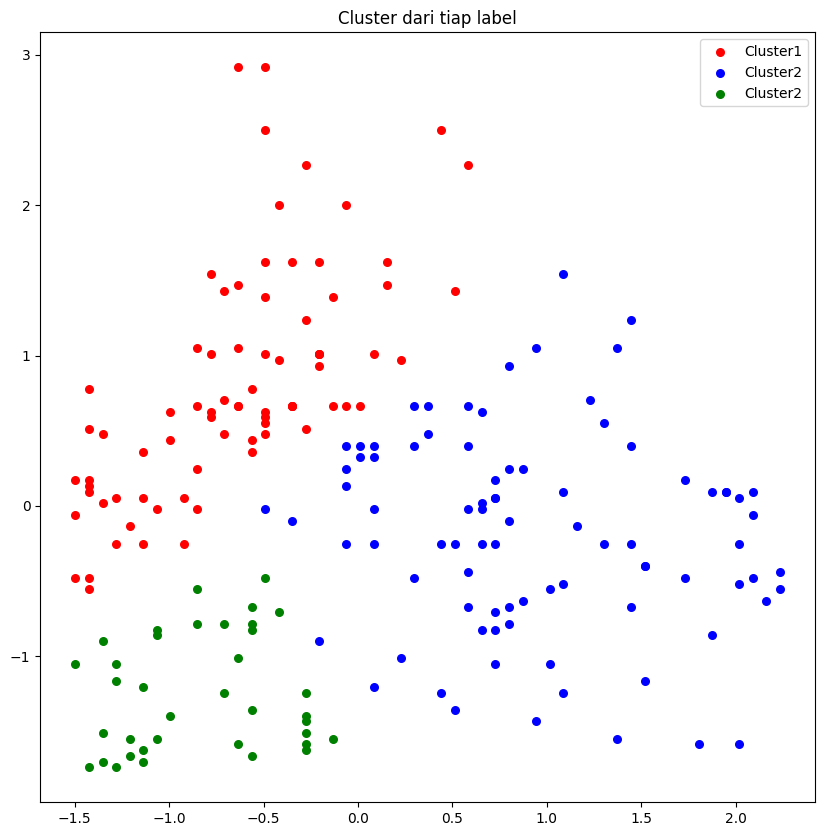

In [10]:
aggClus = hc_cluster.fit_predict(x_scaled)

plt.figure(figsize=(10,10))
plt.scatter(x_scaled[aggClus==0, 0],
            x_scaled[aggClus==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(x_scaled[aggClus==1, 0],
            x_scaled[aggClus==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(x_scaled[aggClus==2, 0],
            x_scaled[aggClus==2, 1], s=30, c='green', label ='Cluster2')

plt.title("Cluster dari tiap label")
plt.legend()
plt.show()

In [11]:
hr_cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [12]:
hr_predict = hr_cluster.fit_predict(points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


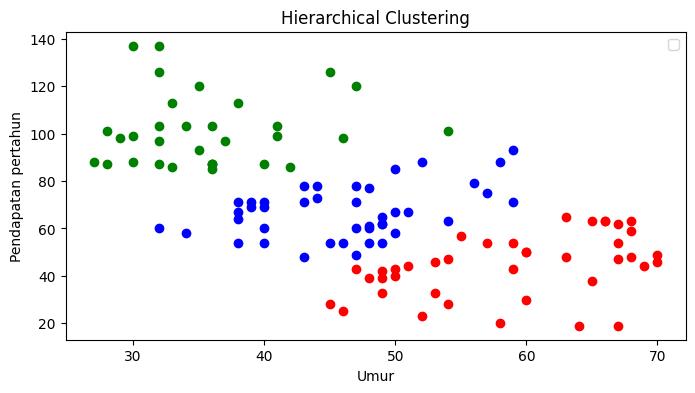

In [13]:
plt.figure(figsize = (8,4))
plt.scatter(points[hr_predict == 0,0], points[hr_predict == 0,1], c = 'green')
plt.scatter(points[hr_predict == 1,0], points[hr_predict == 1,1], c = 'red')
plt.scatter(points[hr_predict == 2,0], points[hr_predict == 2,1], c = 'blue')

plt.title("Hierarchical Clustering")
plt.xlabel("Umur")
plt.ylabel("Pendapatan pertahun")
plt.legend()
plt.show()